In [1]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [9]:
data = {
    'SquareFootage': [1500, 2000, 1800, 2200],
    'Bedrooms': [3, 3, 2, 4],
    'Location': ['Urban', 'Suburban', 'Rural', 'Urban'],
    'Price': [300000, 350000, 250000, 400000]
}
df = pd.DataFrame(data)

In [11]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
location_encoded = encoder.fit_transform(df[['Location']])
location_encoded_df = pd.DataFrame(location_encoded.toarray(), columns=encoder.get_feature_names_out(['Location']))
df_encoded = pd.concat([df.drop(columns=['Location']), location_encoded_df], axis=1)

# Split data into features and target
X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

In [12]:
df.head()

,SquareFootage,Bedrooms,Location,Price
0,1500,3,Urban,300000
1,2000,3,Suburban,350000
2,1800,2,Rural,250000
3,2200,4,Urban,400000


In [13]:
model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

In [14]:
explainer = shap.Explainer(model, X)
shap_values = explainer(X)


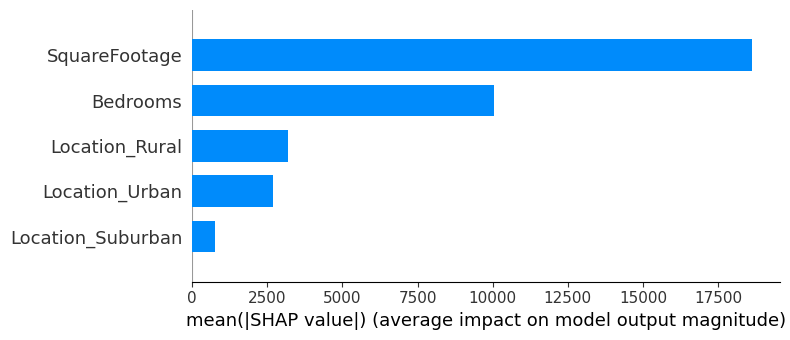

In [15]:
# Visualize the Shapley values
shap.summary_plot(shap_values, X, plot_type="bar")